<a href="https://colab.research.google.com/github/Lexian-6/Sentiment-Analysis-towards-COVID-19-on-Twitter/blob/main/COVIDSenti_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table of Contents**
1. [Introduction, Motivation and Problem Statement](#introduction)
2. [Goal of Our Project](#goal)
3. [Data Source: COVIDSenti Dataset](#data-source)
4. [Exploratory Data Analysis](#data-analysis)
5. (or maybe 5, 6, 7 since we have different models) [Sentiment Analysis Models](#models)
6. [Experimental Setup & Results](#results)
7. [Model Analysis & Interpretation](#analysis--interpretation)
8. [Fine-Tuning and Hyperparameter Tuning](#fine-tuning)
9. [Exploring Different Datasets and Models (if we have time)](#different-datasets)
10. [Conclusion & Future Work](#conclusion)

## **Project Title: Sentiment Analysis towards COVID-19 on Twitter**
## ***Area of Research: Natural Language Processing (NLP)***


## Group name: Pluviophile
### Submitted on: (date here when we submit)

| **Name**           | **Email**                          | **Student Id** |
|--------------------|------------------------------------|----------------|
| Junle Zhou         | junle.zhou@student.unsw.edu.au     | z5431301       |
| Yida Chen          | yida.chen@qq.com                   | z5440476       |
| name               | email                              | ID             |
| name               | email                              | ID             |
| name               | email                              | ID             |


<a name="introduction"></a>
## 1. Introduction, Motivation and Problem Statement

**😷The COVID-19 pandemic** has had an unprecedented impact on global health, the economy, and society as a whole. As governments worldwide implemented measures to control the spread of the virus, such as lockdowns and social distancing, people turned to social media platforms to express their opinions, concerns, and experiences during this crisis.

**📘Twitter**, in particular, has become a crucial platform for public discourse during the pandemic. With millions of tweets posted daily, Twitter provides a vast amount of user-generated content that can be analyzed to gain insights into public sentiment. Understanding public sentiment is essential for policymakers, public health officials, and researchers to make informed decisions and develop effective strategies to address the challenges posed by the pandemic.

**🪧Sentiment analysis**, a subfield of natural language processing, offers a powerful tool to automatically classify the sentiment expressed in text data. By applying sentiment analysis techniques to COVID-19 related tweets, we can gain a deeper understanding of public opinion trends, identify prevalent concerns, and track sentiment shifts over time.

In this project, we will be using the COVIDSenti dataset, which contains tweets related to the COVID-19 pandemic collected from March to April 2020. We will **preprocess the text data, perform exploratory analysis, and develop sentiment classification models using deep learning techniques.** By comparing the performance of different models and analyzing their behavior, we aim to contribute to a better understanding of public sentiment during the COVID-19 pandemic and showcase the potential of sentiment analysis in crisis situations.

<a name="goal"></a>
## 2. 🚩Goal of Our Project

The main goal of this project is to develop and compare deep learning models for sentiment analysis of COVID-19 related tweets. By achieving this goal, we aim to contribute to a better understanding of public sentiment during the pandemic and demonstrate the effectiveness of sentiment analysis techniques in crisis situations.

To achieve this goal, we have set the following objectives:

1. Data Collection and Preprocessing:
   - Utilize the pre-collected COVID-19 related tweets dataset provided by the research paper
   - Preprocess the text data by cleaning, tokenizing, and normalizing the tweets
   - Explore and visualize the dataset to gain insights into its characteristics and distribution

2. Sentiment Analysis Model Development:
   - Implement and train an LSTM model for sentiment classification
   - Fine-tune a pre-trained BERT model for sentiment classification
   - Experiment with different hyperparameters and architectures to optimize model performance

3. Model Evaluation and Comparison:
   - Evaluate the performance of the LSTM and BERT models using appropriate metrics (accuracy, precision, recall, F1-score)
   - Compare the results of the two models and analyze their strengths and weaknesses
   - Interpret the models' behavior and identify important features for sentiment classification

4. Insights and Future Directions:
   - Discuss the implications of our findings for understanding public sentiment during the COVID-19 pandemic
   - Identify limitations of our approach and suggest potential improvements
   - Propose future research directions, such as incorporating more advanced models or expanding the analysis to other datasets

By completing these objectives, we expect to develop accurate and interpretable sentiment analysis models that can be used to track public sentiment trends during the COVID-19 pandemic. Our project will contribute to the growing body of research on sentiment analysis in crisis situations and provide insights that can inform decision-making processes related to the pandemic.

<a name="data-source"></a>
## 3. Data Source: COVIDSenti Dataset

For this project, we used the COVIDSenti dataset, which contains tweets related to the COVID-19 pandemic. The dataset was collected by the authors of the paper "COVIDSenti: A Large-Scale Benchmark Twitter Data Set for COVID-19 Sentiment Analysis" (Naseem et al., 2021) and is publicly available on GitHub.

### 3.1 Data Collection & Availability

- **Collection**:The COVIDSenti dataset was collected using the Twitter API from March 2020 to April 2020, during the early stages of the COVID-19 pandemic. The authors used a set of COVID-19 related keywords and hashtags to filter the tweets, such as "coronavirus", "covid19", "pandemic", "quarantine", and "social distancing".
- **Availability**: The COVIDSenti dataset is publicly available on GitHub, along with the code and resources used in the original paper. This allows for easy reproducibility and comparison of sentiment analysis models trained on this dataset.


### 3.2 Dataset Size and Structure

The COVIDSenti dataset consists of 90,000 tweets, evenly distributed across three sentiment classes: positive, negative, and neutral. The dataset is further divided into three subsets: COVIDSenti-A, COVIDSenti-B, and COVIDSenti-C, each containing 30,000 tweets.

- Full COVIDSenti Dataset (90,000 tweets):

  - The full dataset consists of 90,000 tweets related to COVID-19, collected from February to March 2020.
  - The tweets are labeled into three sentiment classes: positive, negative, and neutral.
  - We use this dataset to provide an overall analysis of the sentiment distribution and to train and evaluate various sentiment classification models.

- COVIDSenti-A (30,000 tweets):

  - COVIDSenti-A is a subset of the full dataset, containing 30,000 tweets.
  - This subset focuses on tweets related to government actions, policies, and public opinions regarding the COVID-19 pandemic.
  - We use COVIDSenti-A to analyze the public sentiment towards government measures and to train and evaluate sentiment classification models specifically for this subset.
  - We can perform specific analyses or case studies related to government actions and policies using this subset.

- COVIDSenti-B (30,000 tweets):

  - COVIDSenti-B is another subset of the full dataset, containing 30,000 tweets.
  - This subset focuses on tweets related to the social and economic impact of the COVID-19 pandemic, such as discussions about social distancing, lockdowns, and the effects on businesses and individuals.
  - We use COVIDSenti-B to analyze the sentiment and opinions surrounding the social and economic aspects of the pandemic.
  - We can conduct specific analyses or case studies related to the social and economic impact using this subset.


- COVIDSenti-C (30,000 tweets):

  - COVIDSenti-C is the third subset of the full dataset, containing 30,000 tweets.
  - This subset focuses on tweets related to the medical and health aspects of the COVID-19 pandemic, such as discussions about symptoms, treatments, and healthcare facilities.
  - We use COVIDSenti-C to analyze the sentiment and opinions related to the medical and health-related topics surrounding the pandemic.
  - We can perform specific analyses or case studies related to medical and health aspects using this subset.

🔍**Each subset allows for targeted sentiment analysis and exploration of specific themes or topics.**


We will train and evaluate sentiment classification models on each subset separately, as well as on the full dataset. This approach can help us assess the performance of the models in capturing sentiment related to different aspects of the pandemic and provides a more comprehensive evaluation of the models' generalization ability.


The CSV files contain the following columns:
- `tweet`: The text content of the tweet
- `label`: The sentiment label assigned to the tweet (positive, negative, or neutral)

### 3.3 ❓Understanding dataset size and structure

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

url = 'https://raw.githubusercontent.com/usmaann/COVIDSenti/main/COVIDSenti.csv'
url_A = 'https://raw.githubusercontent.com/usmaann/COVIDSenti/main/COVIDSenti-A.csv'
url_B = 'https://raw.githubusercontent.com/usmaann/COVIDSenti/main/COVIDSenti-B.csv'
url_C = 'https://raw.githubusercontent.com/usmaann/COVIDSenti/main/COVIDSenti-C.csv'

original_df = pd.read_csv(url)
original_df_A = pd.read_csv(url_A)
original_df_B = pd.read_csv(url_B)
original_df_C = pd.read_csv(url_C)
# Preparing / Initialization for preprocessed dataset
df = pd.read_csv(url)
df_A = pd.read_csv(url_A)
df_B = pd.read_csv(url_B)
df_C = pd.read_csv(url_C)

print(original_df.info())
print(original_df['label'].value_counts())

print("-------------------------------------------------------------------------")
print(original_df_A.info())
print(original_df_A['label'].value_counts())
print("-------------------------------------------------------------------------")
print(original_df_B.info())
print(original_df_B['label'].value_counts())

print("-------------------------------------------------------------------------")
print(original_df_C.info())
print(original_df_C['label'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   90000 non-null  object
 1   label   90000 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB
None
label
neu    67385
neg    16335
pos     6280
Name: count, dtype: int64
-------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   30000 non-null  object
 1   label   30000 non-null  object
dtypes: object(2)
memory usage: 468.9+ KB
None
label
neu    22949
neg     5083
pos     1968
Name: count, dtype: int64
-------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   C

### 3.4 ✨Data Preprocessing
Data preprocessing is a crucial step in NLP research and analysis. It helps in transforming raw data into a clean and structured format that is more suitable for deep learning models.

After all the steps, the preprocessed dataset is then split into training, validation, and testing sets for model development and evaluation.

To prepare the dataset for our sentiment analysis models, we performed the following preprocessing steps:
1. **Lowercase Conversion**:
   - Convert all text to lowercase to ensure consistency and reduce vocabulary size.
   - This step helps in treating words like "Hello" and "hello" as the same token.

2. **Replacing Contractions**:
   - Change contractions like "'t" to "not".
   - This ensures that negations are preserved in the text.

3. **Removing Mentions**:
   - Remove user mentions (e.g., @username) from the tweets.
   - Mentions do not contribute to the sentiment and can introduce noise.

4. **Removing URLs**:
   - Use regular expressions to identify and remove URLs from the tweets.
   - URLs do not typically contribute to sentiment and can introduce noise in the data.

5. **Removing Special Characters and Punctuation**:
   - Use regular expressions to isolate and remove punctuations except for "?".
   - Remove other special characters that do not contribute to sentiment.

6. **Removing Trailing Whitespace**:
   - Remove any trailing whitespace to ensure clean and consistent text data.

7. **Label mapping**:
  - Map the label to 0 (negative) 1 (neutral) and 2 (positive).


In [ ]:
def text_preprocessing(s):
    """
    - Lowercase the sentence
    - Change "'t" to "not"
    - Remove "@name"
    - Isolate and remove punctuations except "?"
    - Remove other special characters
    - Remove trailing whitespace
    """

    # Change 't to 'not'
    s = re.sub(r"\'t", " not", s)
    # Remove @name
    s = re.sub(r'(@.*?)[\s]', ' ', s)
    # Remove urls
    s = re.sub(r'https?://\S+|www\.\S+', '', s)
    # Remove special characters and unwanted patterns
    s = re.sub("‚äô", "", s)
    s = re.sub(r'(@.*?)[\s]', ' ', s)
    s = re.sub(r'(#.*?)[\s]', ' ', s)
    s = re.sub(r'&amp;', '&', s)
    s = re.sub(r'[^?!a-zA-Z0-9\s]', ' ', s)
    # Remove trailing whitespace
    s = re.sub(r'\s+', ' ', s).strip()

    return s
df['tweet'] = df['tweet'].apply(text_preprocessing)
df_A['tweet'] = df_A['tweet'].apply(text_preprocessing)
df_B['tweet'] = df_B['tweet'].apply(text_preprocessing)
df_C['tweet'] = df_C['tweet'].apply(text_preprocessing)

label_mapping = {
  'neg': 0,
  'neu': 1,
  'pos': 2
}

df['label'] = df['label'].map(label_mapping)
df_A['label'] = df_A['label'].map(label_mapping)
df_B['label'] = df_B['label'].map(label_mapping)
df_C['label'] = df_C['label'].map(label_mapping)
dfsample = df.sample(10)

In [ ]:
dfsample

,tweet,label
30028,Reduce your risk from coronavirus,1
23677,Pentagon orders NORTHCOM to prepare for corona...,1
20251,Shanghai officials reveal novel coronavirus tr...,1
75455,Coronavirus London transport worker tests posi...,1
32509,Coronavirus Tenerife hotel horror as lockdown ...,0
68063,One more coronavirus case surfaces in Delhi to...,1
27341,Debunking 13 of the biggest coronavirus myths ...,1
26120,Why did US break cruise ship s quarantine? Som...,1
59474,UPDATE 2 Australia bans arrivals from S Korea ...,0
42201,Well the first British person has died from Pe...,1


<a name="data-analysis"></a>
## 4. 📊Exploratory Data Analysis
- Visualize the distribution of sentiment labels in the dataset
- Visualize the length distribution of tweets
- Identify the most common words and bigrams in each sentiment class
- Visualize using word cloud
- And more (to be added)

### 4.1 Visualize the distribution of sentiment labels in the dataset
- This part involves creating a visualization of the distribution of sentiment labels within our dataset. We use bar charts to show how many tweets fall into each sentiment category (e.g., positive, negative, neutral).


- This helps in understanding the overall sentiment balance of the dataset, which is crucial for tasks like training sentiment analysis models, as it can highlight potential class imbalances that might affect model training.

TODO: analysis for this part

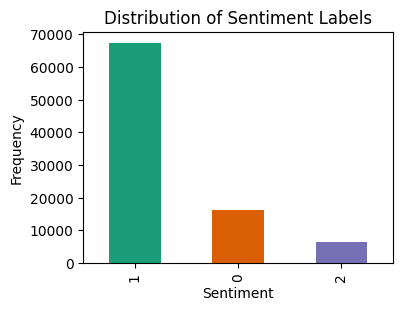

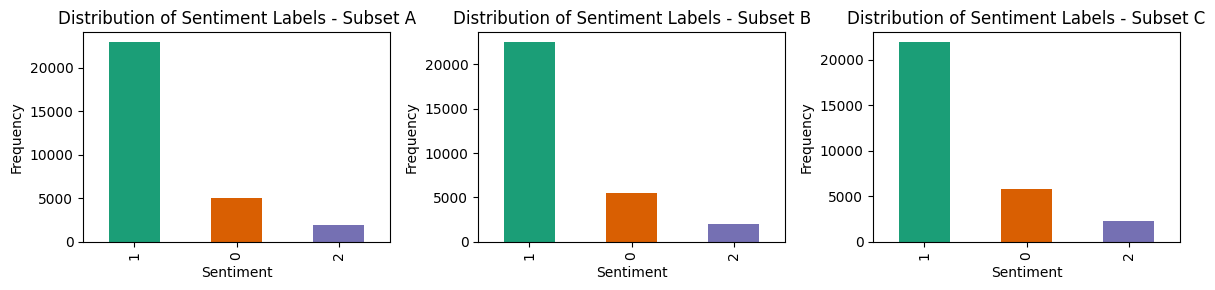

In [ ]:
# Plot for the full dataset
df['label'].value_counts().plot(kind='bar', color=sns.color_palette('Dark2'), figsize=(4, 3))
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(12, 3))
# Subplot for subset A
df_A['label'].value_counts().plot(kind='bar', color=sns.color_palette('Dark2'), ax=axs[0])
axs[0].set_title('Distribution of Sentiment Labels - Subset A')
axs[0].set_xlabel('Sentiment')
axs[0].set_ylabel('Frequency')

# Subplot for subset B
df_B['label'].value_counts().plot(kind='bar', color=sns.color_palette('Dark2'), ax=axs[1])
axs[1].set_title('Distribution of Sentiment Labels - Subset B')
axs[1].set_xlabel('Sentiment')
axs[1].set_ylabel('Frequency')

# Subplot for subset C
df_C['label'].value_counts().plot(kind='bar', color=sns.color_palette('Dark2'), ax=axs[2])
axs[2].set_title('Distribution of Sentiment Labels - Subset C')
axs[2].set_xlabel('Sentiment')
axs[2].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

### 4.2 Visualize & Analyze the length distribution of tweets
- Analyzing the length distribution of tweets involves plotting the number of characters or words per tweet. This analysis is significant because it can affect how we design our model, especially for neural networks where input shape needs to be consistent. (might not be that useful if we are using RNN I guess? But we can still analyze it.)


TODO: analysis for this part

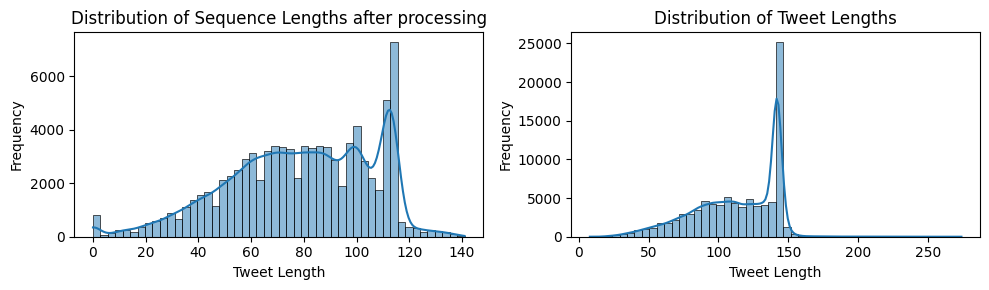

In [ ]:
# Calculate tweet lengths for the processed DataFrame
df['tweet_length'] = df['tweet'].apply(lambda x: len(str(x)))

# Calculate tweet lengths for the original DataFrame
original_df['tweet_length'] = original_df['tweet'].apply(lambda x: len(str(x)))

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

# Plot the distribution of sequence lengths after processing
sns.histplot(data=df, x='tweet_length', bins=50, kde=True, ax=ax1)
ax1.set_title('Distribution of Sequence Lengths after processing')
ax1.set_xlabel('Tweet Length')
ax1.set_ylabel('Frequency')

# Plot the distribution of tweet lengths in the original DataFrame
sns.histplot(data=original_df, x='tweet_length', bins=50, kde=True, ax=ax2)
ax2.set_title('Distribution of Tweet Lengths')
ax2.set_xlabel('Tweet Length')
ax2.set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# Remove the 'tweet_length' column from both DataFrames
df = df.drop('tweet_length', axis=1)
original_df = original_df.drop('tweet_length', axis=1)

### 4.3 Identify the most common words and bigrams in each sentiment class

In [ ]:
import nltk
from nltk.corpus import stopwords
import pandas as pd

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
no_stopwords_df = df.copy()
no_stopwords_df['tweet'] = df['tweet'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
reverse_label_mapping = {
    0:"neg",
    1:"neu",
    2:"pos",
}
no_stopwords_df['label'] = no_stopwords_df['label'].map(reverse_label_mapping)

In [26]:
no_stopwords_df

,tweet,label
0,Coronavirus Human Coronavirus Types CDC,neu
1,true Corona virus swine flue Bird flu December...,neu
2,TLDR SARS possibly new coronavirus Difficult c...,neg
3,Disease outbreak news Middle East respiratory ...,neu
4,China Media WSJ says sources tell mystery pneu...,neu
...,...,...
89995,flu 2 death rate coronavirus 3 fine 3 risk older,neu
89996,already know idiot bungled Coronavirus pandemi...,neg
89997,First coronavirus case reported St Joseph Coun...,neu
89998,ate ants child immune coronavirus,neu


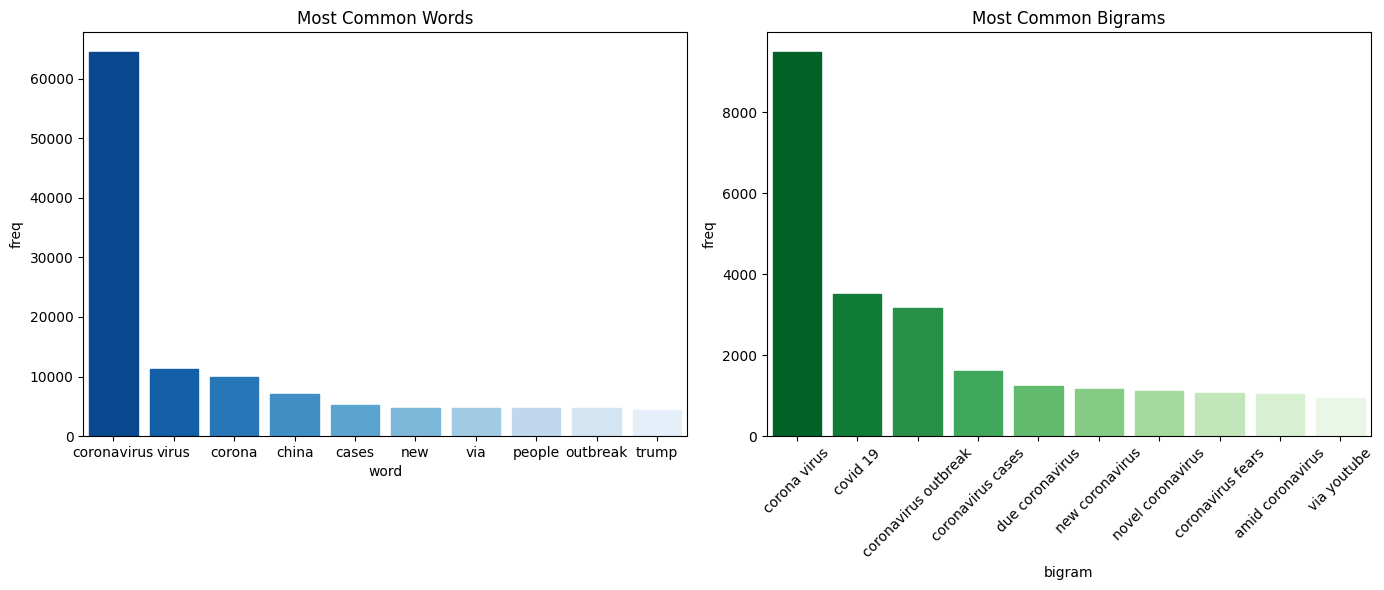

In [28]:

from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(no_stopwords_df['tweet'], 10)
df_common_words = pd.DataFrame(common_words, columns=['word', 'freq'])


def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

common_bigrams = get_top_n_bigram(no_stopwords_df['tweet'], 10)
df_common_bigrams = pd.DataFrame(common_bigrams, columns=['bigram', 'freq'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for most common words
barplot_words = sns.barplot(x='word', y='freq', data=df_common_words, ax=ax1)
barplot_words.set_title('Most Common Words')

# Manually setting the colors for words
palette_words = sns.color_palette("Blues_r", n_colors=len(df_common_words))
for bar, color in zip(barplot_words.patches, palette_words):
    bar.set_color(color)


# Plot for most common bigrams
barplot_bigrams = sns.barplot(x='bigram', y='freq', data=df_common_bigrams, ax=ax2)
barplot_bigrams.set_title('Most Common Bigrams')

# Manually setting the colors for bigrams
palette_bigrams = sns.color_palette("Greens_r", n_colors=len(df_common_bigrams))
for bar, color in zip(barplot_bigrams.patches, palette_bigrams):
    bar.set_color(color)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
for sentiment in ['pos', 'neg', 'neu']:
    print(f"\nMost common words in {sentiment} tweets:")
    common_words = get_top_n_words(no_stopwords_df[no_stopwords_df['label'] == sentiment]['tweet'], 20)
    df_common_words = pd.DataFrame(common_words, columns=['word', 'freq'])
    print(df_common_words)

    print(f"\nMost common bigrams in {sentiment} tweets:")
    common_bigrams = get_top_n_bigram(no_stopwords_df[no_stopwords_df['label'] == sentiment]['tweet'], 20)
    df_common_bigrams = pd.DataFrame(common_bigrams, columns=['bigram', 'freq'])
    print(df_common_bigrams)


Most common words in pos tweets:
           word  freq
0   coronavirus  4233
1         virus   915
2        corona   837
3         china   541
4        latest   493
5         cases   468
6          good   447
7        people   444
8          many   421
9         trump   315
10         safe   313
11         news   312
12     outbreak   290
13         best   286
14           19   275
15        great   270
16        covid   269
17           us   253
18          top   240
19          via   230

Most common bigrams in pos tweets:
                  bigram  freq
0           corona virus   791
1               covid 19   266
2   coronavirus outbreak   196
3      novel coronavirus   158
4      coronavirus cases   124
5             many cases   106
6            cases china   105
7             death toll   104
8     countries affected   101
9         affected novel    99
10      coronavirus many    79
11           cruise ship    77
12             stay safe    75
13        latest updates    73
14 

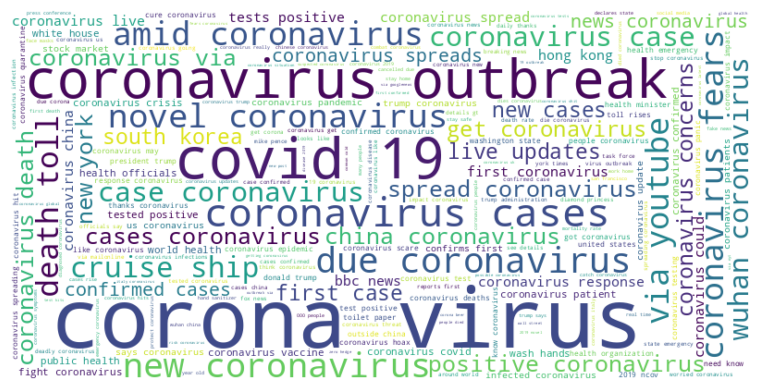

In [31]:
from wordcloud import WordCloud

def generate_bigram_wordcloud(text, size=(8,4), max_words=200):
    # Create a CountVectorizer object with bigrams
    cv = CountVectorizer(ngram_range=(2, 2))

    # Fit and transform the text
    bigram_counts = cv.fit_transform(text)

    # Convert the bigram counts to a dictionary
    bigram_dict = dict(zip(cv.get_feature_names_out(), bigram_counts.sum(axis=0).tolist()[0]))

    # Create a word cloud object
    wc = WordCloud(width=size[0]*100, height=size[1]*100, background_color='white', colormap='viridis', max_words=max_words)

    # Generate the word cloud
    wc.generate_from_frequencies(bigram_dict)
    return wc
    # Display the word cloud
    plt.figure(figsize=size)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display the word cloud
all_tweets_wordcloud = generate_bigram_wordcloud(no_stopwords_df['tweet'])
plt.figure(figsize=(8, 4))
plt.imshow(all_tweets_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()


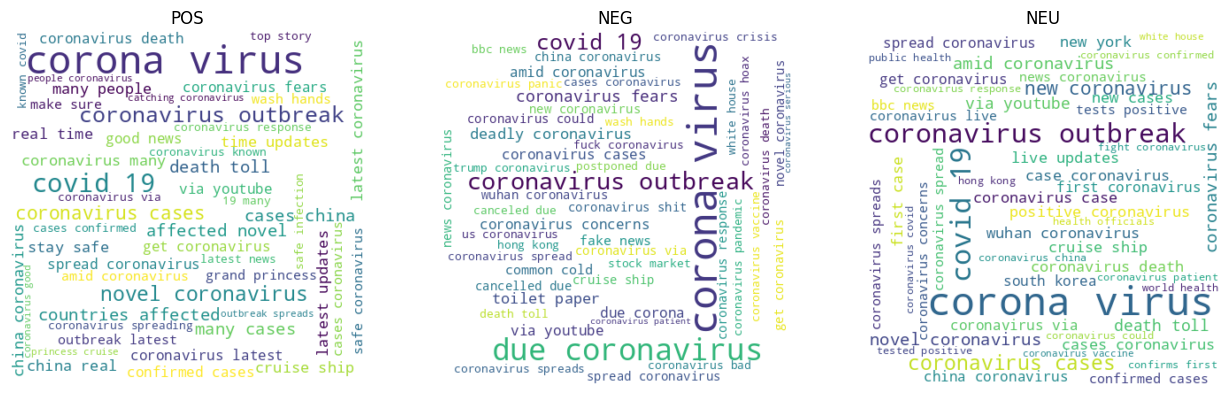

In [32]:
# Generate bigram word clouds for each sentiment class
# Define the sentiments
sentiments = ['pos', 'neg', 'neu']

# Create a single row of subplots with figsize (12, 4) for all three plots together
fig, axs = plt.subplots(1, 3, figsize=(13, 4))  # Each subplot having an effective figsize of (4, 4)

# Generate and display word clouds for each sentiment
for i, sentiment in enumerate(sentiments):
    # Filter the dataframe for the current sentiment
    filtered_tweets = no_stopwords_df[no_stopwords_df['label'] == sentiment]['tweet']

    # Generate the word cloud for the filtered tweets
    sentiment_wordcloud = generate_bigram_wordcloud(filtered_tweets, size=(4, 4), max_words=50)  # Adjust size as needed

    # Display the word cloud in the ith subplot
    axs[i].imshow(sentiment_wordcloud, interpolation='bilinear')
    axs[i].axis('off')  # Hide the axes
    axs[i].set_title(f'{sentiment.upper()}')  # Set title for each subplot

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


<a name="models"></a>
## 5. Sentiment Analysis Models
- Introduce the LSTM and BERT models for sentiment analysis
- Discuss the architecture and key features of each model
- Explain the process of tokenization, embedding, and model training
- Describe any modifications or hyperparameter tuning performed on the models

<a name="results"></a>
## 6. Experimental Setup & Results
- Explain the train-validation-test split of the dataset
- Discuss the choice of evaluation metrics (accuracy, precision, recall, F1-score)
- Present the results of the LSTM and BERT models on the test set
- Compare the performance of the models and discuss their strengths and weaknesses
- Visualize the learning curves and confusion matrices for each model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<a name="analysis--interpretation"></a>
## 7. Model Analysis & Interpretation
- Analyze the attention weights of the BERT model to identify important words and phrases for each sentiment class
- Visualize the learned word embeddings of the LSTM model and try to explore semantic relationships *(I'm not very confident, to be honest. I struggled a bit with analyzing the inner workings of the LSTM model in Assignment 1)*
- Maybe use techniques like LIME or SHapley Additive exPlanations (SHAP) to interpret the model predictions
- Discuss interesting or surprising findings from the model analysis

<a name="fine-tuning"></a>
## 8. Fine-Tuning and Hyperparameter Tuning
- Experiment with different hyperparameters for the LSTM and BERT models (learning rate, batch size, number of layers, etc.)
- Perform fine-tuning of the BERT model on the COVIDSenti dataset
- Discuss the impact of hyperparameter tuning and fine-tuning on model performance

<a name="different-datasets"></a>
## 9. Exploring Different Datasets and Models (if we have time)
- Apply the sentiment analysis models to other COVID-19 related datasets
- Experiment with different pre-trained word embeddings (GloVe, FastText, etc.)
- Explore other deep learning architectures for sentiment analysis (CNN, BiLSTM, AlBERT, XLNet etc.)
- Compare the performance of the models across different datasets and architectures

<a name="conclusion"></a>
## 10. Conclusion & Future Work
- Summarize the main findings and contributions of the project
- Discuss the limitations and potential improvements of the current approach
- Suggest future research directions. I don't know, maybe explore something such as incorporating multimodal data (images, videos) or exploring cross-lingual sentiment analysis
- Reflect on the broader implications of the project for understanding public sentiment during crises